In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Function for bubble heatmap

def heatmap_with_circles(df, ax=None):
    if ax is None:
        ax = plt.gca()
    
    
    # Normalize the dataframe for circle sizes using the absolute maximum value
    abs_max = np.max(np.abs(df.values))
    df_normalized = df / abs_max
    
    # Apply scaling factor to exaggerate size differences
    circle_sizes = np.abs(df_normalized) ** 3
    
    # Set up the matplotlib figure
    ax.set_aspect("equal")
    
    # Generate a scatter plot with circles representing data values
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = df.iloc[i, j]
            size = circle_sizes.iloc[i, j] * 750  # Scale circle size
            #size = df_normalized.iloc[i, j] * 750  # Scale circle size
            color = plt.cm.viridis(val / (df.max().max()))
            ax.scatter(j, i, s=size, color=color, alpha=0.6, edgecolors='black', zorder=2)
    
    # Set ticks and labels
    ax.set_xticks(np.arange(df.shape[1]))
    ax.set_yticks(np.arange(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=90)
    ax.set_yticklabels(df.index)
    
    # Add gridlines
    import matplotlib.ticker as ticker
    ax.minorticks_on()
    ax.grid(which='minor', color='black', linestyle=':', linewidth=0.5, zorder=1)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
    # Add padding to the edges to prevent bubbles from getting cropped
    ax.set_xlim(-0.5, df.shape[1] - 0.5)
    ax.set_ylim(df.shape[0] - 0.5, -0.5)

    # Hide the grid
    ax.grid(False)

    # Hide the frame
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    
    # Colorbar for reference
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=df.max().max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.ax.set_ylabel('% arabinose')

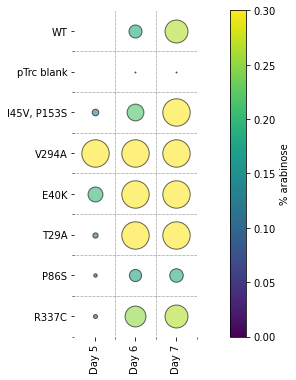

In [3]:
#pTrc backbone bubble heatmap
#2% CO2, ambient O2, ambient temp. 0.05% ara-0.3% ara
#Data is highest arabinose concentration on each day, averaged from three trials.

data = {
"WT": [	.001	,	0.183333333	,	0.266666667	],
    
"pTrc blank": [	.001	,	0.033333333	,	0.033333333	],
    
"I45V, P153S": [	0.116666667	,	0.216666667	,	0.3],

"V294A": [	0.3	,	0.3	,	0.3],
    
"E40K": [	0.2	,	0.3	,	0.3],
    
"T29A": [	0.1	,	0.3	,	0.3	],
    
"P86S": [0.075	,	0.175	,	0.1875],
            
"R337C": [	0.083333333	,	0.25	,	0.266666667	],

}


index_labels = ["Day 5", "Day 6", "Day 7"]

df = pd.DataFrame(data)

df = pd.DataFrame(data, index=index_labels)

# Transpose the DataFrame
df = df.T

# Set up the matplotlib figure with a wider aspect ratio
fig, ax = plt.subplots(figsize=(12, 6))

# Draw the custom heatmap
heatmap_with_circles(df, ax=ax)

plt.savefig('Fig_name',dpi=600)